In [26]:
import json
import pickle

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
model = "llama3_3b_chat"
dataset = "gsm8k"
prompt_version = "cot_3_shot"
dataset_subset = "main"
input_type = "prompt_answer"
layer = "27"

In [27]:
def plot_postprocessed(model, dataset, prompt_version, dataset_subset, input_type, layer, postprocessing_method):
    postprocessed_act = np.load(f"./activations/postprocessed/{model}/{dataset}/{prompt_version}/{dataset_subset}/{input_type}/layer_{layer}/activations_{postprocessing_method}.npy")
    evaluated_gen = pd.read_csv(f"./evaluations/{model}/{dataset}/{prompt_version}/{dataset_subset}_generations_evaluated.csv")["correct"].to_numpy()

    # Visualize the activations
    import matplotlib.pyplot as plt

    plt.scatter(postprocessed_act[:, 0], postprocessed_act[:, 1], s=1, c=evaluated_gen, cmap="coolwarm")
    # Define labels for colors
    cbar = plt.colorbar()
    cbar.set_label("Correctness")
    plt.xlabel(f"{postprocessing_method} 1")
    plt.ylabel(f"{postprocessing_method} 2")
    plt.title(f"{postprocessing_method} of layer {layer} activations")
    plt.show()

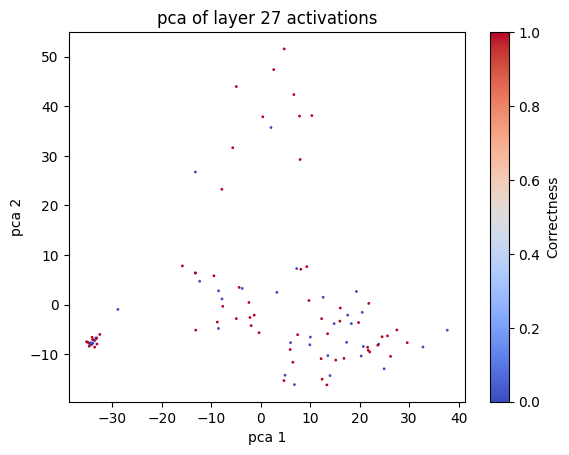

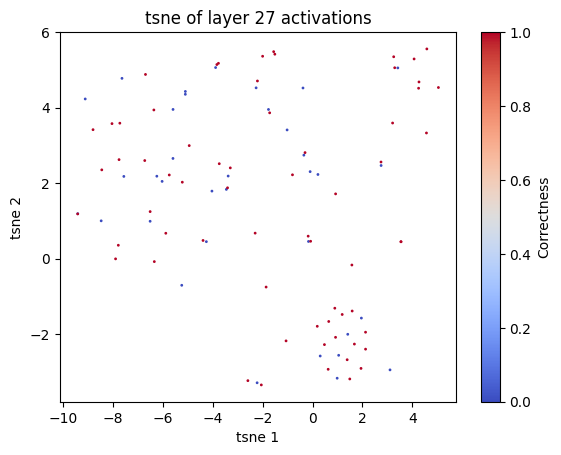

In [29]:
for postprocessing_method in ["pca", "tsne"]:
    plot_postprocessed(model, dataset, prompt_version, dataset_subset, input_type, layer, postprocessing_method)